In [ ]:
# Notebook: Pandas Pairwise Correlation
# Author: Thomas Purk
# Date: 2025-03-30
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html
# Reference: https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/

# Pandas Pairwise Correlation

Demonstrates how to find similar items in a movie rating database to drive a recommendation analysis.

>In statistics, the Pearson correlation coefficient (PCC)[a] is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1.

[https://en.wikipedia.org/wiki/Pearson_correlation_coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

>In statistics, the Kendall rank correlation coefficient, commonly referred to as Kendall's τ coefficient (after the Greek letter τ, tau), is a statistic used to measure the ordinal association between two measured quantities. A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient. It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities.

[https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

>In statistics, Spearman's rank correlation coefficient or Spearman's ρ, named after Charles Spearman and often denoted by the Greek letter ρ(rho) or as r_s, is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

[https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

**Dataset**

Note: This notebook is based on a course execise from https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/. The data used here was provided as part of the course materials.

In [20]:
# Notebook Setup

# Data, Arrays, Linear Algebra
import numpy as np
import pandas as pd

# Visualization
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Add for better Jupyter Notebook compatibility
%matplotlib inline

# Prevent Pandas and other warnings from displaying above outputcells, improve readability
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # See warnings one time#

In [1]:
# Load Data
# Source: Obtained from the "Python for Data Science and Machine Learning Bootcamp"
# Reference: https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/
from google.colab import files
uploaded = files.upload()

Saving Movie_Id_Titles to Movie_Id_Titles
Saving u.data to u.data


In [2]:
uploaded.keys()

dict_keys(['Movie_Id_Titles', 'u.data'])

In [31]:
# Load Data - continued
df_titles = pd.read_csv('Movie_Id_Titles')

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_ratings = pd.read_csv(
    filepath_or_buffer='u.data',
    sep='\t',
    names=column_names
)

# Combine the two dataframes to connect movie titles to movie user ratings
df = pd.merge(df_titles,df_ratings,on='item_id')

# Validate
display(df.head())


,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


## Exploratory Data Analysis


In [32]:
# Explore Titles & Ratings
df.describe()

,item_id,user_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,425.520914,462.470876,3.529864,8.835288e+08
std,330.797791,266.622454,1.125704,5.343791e+06
min,1.000000,0.000000,1.000000,8.747247e+08
25%,175.000000,254.000000,3.000000,8.794487e+08
50%,322.000000,447.000000,4.000000,8.828269e+08
75%,631.000000,682.000000,4.000000,8.882600e+08
max,1682.000000,943.000000,5.000000,8.932866e+08


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   item_id    100003 non-null  int64 
 1   title      100003 non-null  object
 2   user_id    100003 non-null  int64 
 3   rating     100003 non-null  int64 
 4   timestamp  100003 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [34]:
# Unique counts for each feature
df.nunique()

,0
item_id,1682
title,1664
user_id,944
rating,5
timestamp,49282


In [46]:
# Create a new DataFrame for Average Rating and Number of ratings per title
df_title_ratings = pd.DataFrame(df.groupby('title')['rating'].mean()).reset_index()
df_title_ratings['number_ratings'] = df.groupby('title')['rating'].count().reset_index()['rating']
df_title_ratings.head()

,title,rating,number_ratings
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


<Axes: >

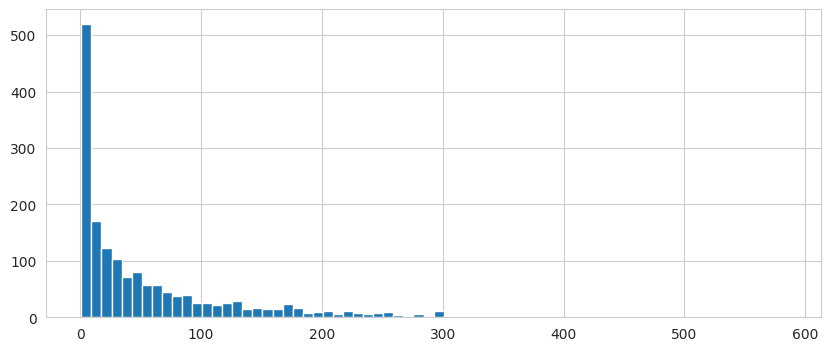

In [48]:
# Explore new aggregate features
plt.figure(figsize=(10,4))
df_title_ratings['number_ratings'].hist(bins=70)

<Axes: >

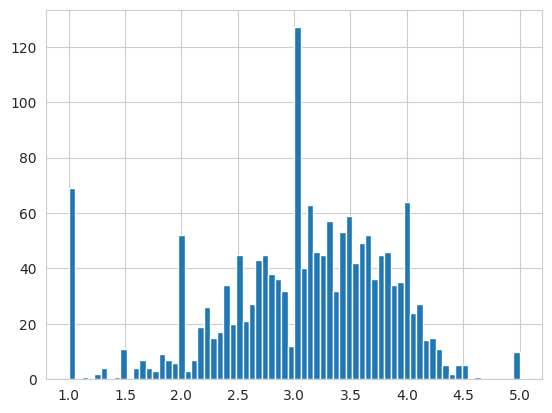

In [49]:
df_title_ratings['rating'].hist(bins=70)

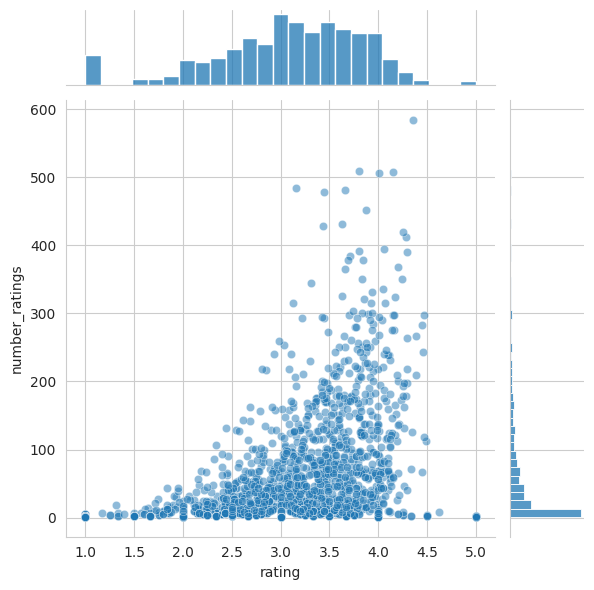

In [50]:
# Compare the Average to the Number of Ratings
sns.jointplot(
    x='rating',
    y='number_ratings',
    data=df_title_ratings,
    alpha=0.5
)

In [ ]:
# Observation: The above chart demonstates the Law of Large Numbers
# - The more reviews there are for a movie, the more the data approximates the expected mean, 3.

## Create a Recommender Model

In [51]:
# Create a pivoted dataframe
df_user_titles = df.pivot_table(index='user_id',columns='title',values='rating')
df_user_titles.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Display some sample movies with high number of ratings
df_title_ratings.sort_values('number_ratings',ascending=False).head(10)

,title,rating,number_ratings
1398,Star Wars (1977),4.359589,584
333,Contact (1997),3.803536,509
498,Fargo (1996),4.155512,508
1234,Return of the Jedi (1983),4.007890,507
860,Liar Liar (1997),3.156701,485
460,"English Patient, The (1996)",3.656965,481
1284,Scream (1996),3.441423,478
1523,Toy Story (1995),3.878319,452
32,Air Force One (1997),3.631090,431
744,Independence Day (ID4) (1996),3.438228,429


In [153]:
# Work with Star Wars as an example.
starwars_user_ratings = df_user_titles['Star Wars (1977)']
starwars_user_ratings.head()

,Star Wars (1977)
user_id,
0,5.0
1,5.0
2,5.0
3,NaN
4,5.0


In [154]:
# Find other movies that have similar average movie ratings as Star Wars
pearson_corr_starwars = df_user_titles.corrwith(starwars_user_ratings, method='pearson')
kendall_corr_starwars = df_user_titles.corrwith(starwars_user_ratings, method='kendall')
spearman_corr_starwars = df_user_titles.corrwith(starwars_user_ratings, method='spearman')

# Convert the correlation series into a dataframe
corr_starwars = pd.DataFrame(pearson_corr_starwars,columns=['pearson_corr']).reset_index()
corr_starwars['kendall_corr'] = kendall_corr_starwars.values
corr_starwars['spearman_corr'] = spearman_corr_starwars.values


# Refine the recommendation model by accounting for how many times a movie was reviewed.
# Movies with low numbers of reviews may not have averages that are relevant to correlation
corr_starwars['number_ratings'] = df_title_ratings['number_ratings']

# Remove Nulls, where there was not correlation given
corr_starwars.dropna(inplace=True)

# Sort for best correlation
corr_starwars.sort_values(
    by='pearson_corr',
    ascending=False,
    inplace=True
)

corr_starwars

,title,pearson_corr,kendall_corr,spearman_corr,number_ratings
1398,Star Wars (1977),1.0,1.0,1.0,584
1418,Stripes (1981),1.0,1.0,1.0,5
688,Hollow Reed (1996),1.0,1.0,1.0,6
935,Man of the Year (1995),1.0,1.0,1.0,9
343,Cosi (1996),1.0,1.0,1.0,4
...,...,...,...,...,...
722,I Like It Like That (1994),-1.0,-1.0,-1.0,3
353,Crossfire (1947),-1.0,-1.0,-1.0,4
54,American Dream (1990),-1.0,-1.0,-1.0,2
1549,Two Deaths (1995),-1.0,-1.0,-1.0,4


## Run the model

- Recommend 5 movies which are most similar in ratings profile to Star Wars

In [155]:
print('')
df_recommendations = corr_starwars[corr_starwars['number_ratings']>100]
df_recommendations = df_recommendations[df_recommendations['title'] != 'Star Wars (1977)']
df_recommendations = df_recommendations.sort_values('pearson_corr',ascending=False).head(5)
df_recommendations

,title,pearson_corr,kendall_corr,spearman_corr,number_ratings
456,"Empire Strikes Back, The (1980)",0.748353,0.614824,0.651672,368
1234,Return of the Jedi (1983),0.672556,0.569247,0.612738,507
1205,Raiders of the Lost Ark (1981),0.536117,0.416089,0.448505,420
104,Austin Powers: International Man of Mystery (1...,0.377433,0.350660,0.397251,130
1407,"Sting, The (1973)",0.367538,0.345654,0.380552,241


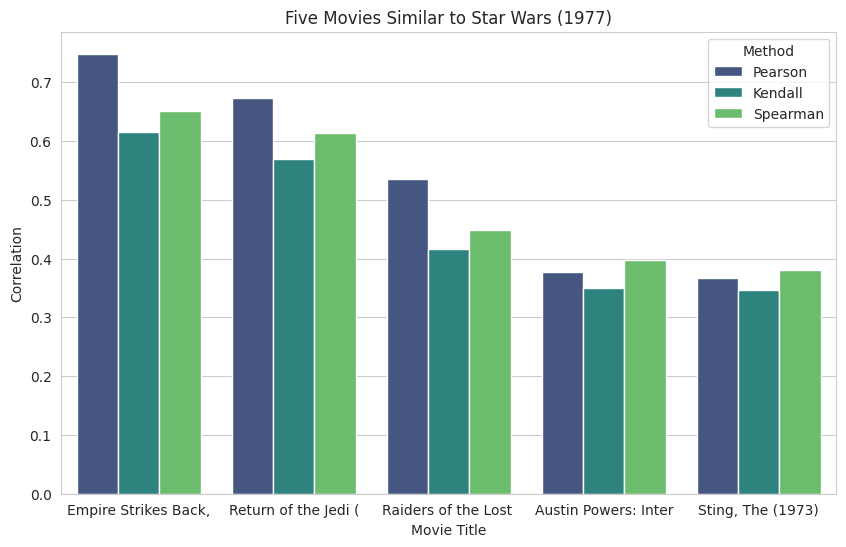

In [156]:
# Plot the Data side by side in a grouped bar chart

# Convert to Long Format (Melt the DataFrame)
df_plot = df_recommendations[['title','pearson_corr','kendall_corr','spearman_corr']]
df_plot['title'] = df_plot['title'].str[:20]
df_melted = df_plot.melt(id_vars='title', var_name='Corr Type', value_name='Value')

# Create grouped bar chart
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='title',
    y='Value',
    hue='Corr Type',
    data=df_melted,
    palette='viridis'
)

# Add labels
plt.xlabel("Movie Title")
plt.ylabel("Correlation")
plt.title("Five Movies Similar to Star Wars (1977)")
handles, labels = ax.get_legend_handles_labels()
plt.legend(title="Method", handles=handles, labels=['Pearson','Kendall','Spearman'])
plt.show()